In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Delivery_time -> Predict delivery time using sorting time 

In [2]:
salary = pd.read_csv('Salary_data.csv')

In [3]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
salary.count()

YearsExperience    30
Salary             30
dtype: int64

In [6]:
salary.mean()

YearsExperience        5.313333
Salary             76003.000000
dtype: float64

In [7]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
salary.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [9]:
salary.shape

(30, 2)

/Users/vaibhavitaide/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

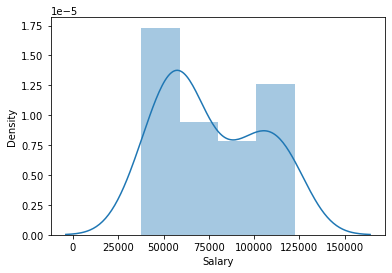

In [10]:
sns.distplot(salary['Salary'])

/Users/vaibhavitaide/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

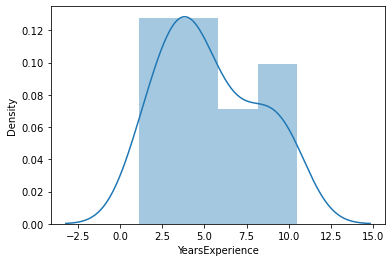

In [11]:
sns.distplot(salary['YearsExperience'])

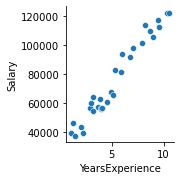

In [12]:
sns.pairplot(y_vars = 'Salary', x_vars = 'YearsExperience' ,data = salary)

In [13]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

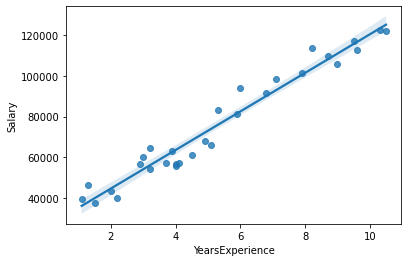

In [14]:
sns.regplot(x=salary['YearsExperience'],y=salary['Salary'])

In [15]:
import statsmodels.formula.api as smf

In [16]:
model=smf.ols("Salary~YearsExperience",data=salary).fit()

In [17]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [18]:
model.tvalues , model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [19]:
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [20]:
# Automatic Prediction for say 3 & 6 Years Experience 

In [21]:
newdata= pd.Series([3,6])

In [22]:
newdata

0    3
1    6
dtype: int64

In [23]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,6


In [24]:
model.predict(data_pred)

0    54142.087163
1    82491.974127
dtype: float64

## 2) Salary_hike -> Build a prediction model for Salary_hike


In [25]:
delivery = pd.read_csv('delivery_time.csv')

In [26]:
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [27]:
delivery.shape

(21, 2)

In [28]:
delivery.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [29]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [30]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [31]:
delivery.mean()

Delivery Time    16.790952
Sorting Time      6.190476
dtype: float64

/Users/vaibhavitaide/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

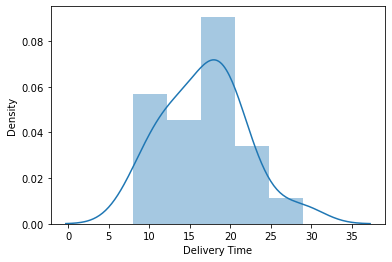

In [32]:
sns.distplot(delivery['Delivery Time'])

/Users/vaibhavitaide/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

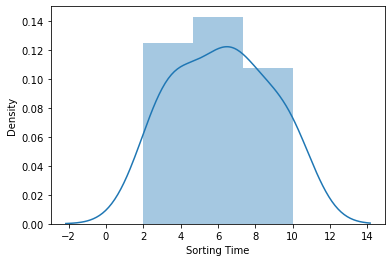

In [33]:
sns.distplot(delivery['Sorting Time'])

In [34]:
delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

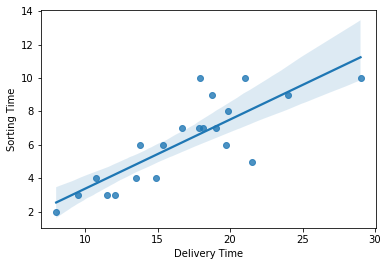

In [35]:
sns.regplot(x=delivery['Delivery Time'],y=delivery['Sorting Time'])


In [36]:
delivery=delivery.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
delivery

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [67]:
model=smf.ols("delivery_time~sorting_time",data=delivery).fit()

In [68]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [69]:
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [70]:
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [71]:
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [72]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred


,sorting_time
0,5
1,8


In [73]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64